In [6]:
import tensorflow
from  tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

### Exploración y preparación

3 classes:
['Atletico Madrid', 'Dortmund', 'Real Madrid']


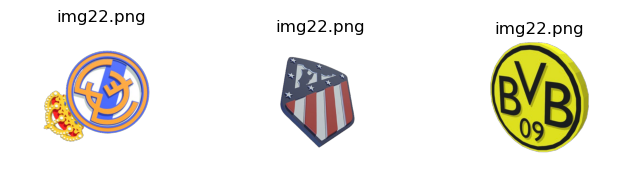

In [7]:
# The images are in the data/shapes folder
data_folder = 'dataframe/logo'

# Get the class names
classes = os.listdir(data_folder)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(8, 12))
i = 0
for sub_dir in os.listdir(data_folder):
    i+=1
    img_file = os.listdir(os.path.join(data_folder,sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 5

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.2) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Getting Data...
Preparing training dataset...
Found 60 images belonging to 3 classes.
Preparing validation dataset...
Found 12 images belonging to 3 classes.
Data generators ready


### CNN

In [10]:
# Define un modelo clasificador CNN (Convolutional Neural Network)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define el modelo como una secuencia de capas
modelo = Sequential()

# La capa de entrada acepta una imagen y aplica una convolución que utiliza 32 filtros de tamaño 6x6 y una función de activación lineal rectificada (ReLU)
modelo.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))

# A continuación, agregamos una capa de max pooling con un parche de tamaño 2x2
modelo.add(MaxPooling2D(pool_size=(2,2)))

# Podemos agregar tantas capas como creamos necesarias; aquí agregaremos otra capa de convolución y de max pooling
modelo.add(Conv2D(32, (6, 6), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

# Y otro conjunto
modelo.add(Conv2D(32, (6, 6), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

# Una capa de dropout elimina aleatoriamente algunos nodos para reducir las interdependencias (que pueden causar sobreajuste)
modelo.add(Dropout(0.2))

# Aplanamos los mapas de características
modelo.add(Flatten())

# Generamos una capa de salida completamente conectada con una probabilidad predicha para cada clase
# (softmax asegura que todas las probabilidades sumen 1)
modelo.add(Dense(train_generator.num_classes, activation='softmax'))

# Con las capas definidas, ahora podemos compilar el modelo para clasificación categórica (multi-clase)
modelo.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(modelo.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 123, 123, 32)   │         3,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 32)     │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 23, 23, 32)     │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │        11,619 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,899 (347.26 KB)

 Trainable params: 88,899 (347.26 KB)

 Non-trainable params: 0 (0.00 B)

None
